In [26]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [27]:
# Load the Auto Quote Ins data

Teledata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Telecom_Customer_Churn.csv", header=0)

# Copy the data to backup file

Teledata_BK = Teledata.copy()

# Display first 5 records

Teledata.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [28]:
# Display the Telecom dataset information

Teledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [29]:
# Convert the target variable data type into interger

Teledata['Churn'] = Teledata['Churn'].str.replace('Yes', '1')
Teledata['Churn'] = Teledata['Churn'].str.replace('No', '0')
Teledata['Churn'] = Teledata['Churn'].astype(int)


In [30]:
#Display target variable "Churn"

Teledata['Churn'].value_counts(sort=False)

0    5174
1    1869
Name: Churn, dtype: int64

In [31]:
# Count the target or independent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Churn_count = Teledata.Churn.value_counts()
print('Class 0:', Churn_count[0])
print('Class 1:', Churn_count[1])
print('Proportion:', round(Churn_count[0] / Churn_count[1], 2), ': 1')
print('Total Records:', len(Teledata))

Class 0: 5174
Class 1: 1869
Proportion: 2.77 : 1
Total Records: 7043


In [32]:
# Displaying Duplicate values with in Loan ataset, if avialble

Teledata_dup = Teledata[Teledata.duplicated(keep='last')]
Teledata_dup

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn


In [33]:
# Count the missing values by each variable, if available

Teledata.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [34]:
#Check the unique records counts

Teledata.nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           4
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
dtype: int64

In [35]:
# Dropping the variables which are not impacting the target variable

Teledata = Teledata.drop(['CustomerID', 'OnlineSecurity', 'OnlineBackup'], axis=1)

In [36]:
# Display the Telecom dataset information

Teledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  Churn             7043 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(

In [37]:
# Use LabelEncoder for converting Object Variable datatype to integer variable datatype

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Teledata['Gender'] = LE.fit_transform(Teledata['Gender'])
Teledata['Partner'] = LE.fit_transform(Teledata['Partner'])
Teledata['Dependents'] = LE.fit_transform(Teledata['Dependents'])
Teledata['SeniorCitizen'] = LE.fit_transform(Teledata['SeniorCitizen'])
Teledata['PhoneService'] = LE.fit_transform(Teledata['PhoneService'])
Teledata['PaperlessBilling'] = LE.fit_transform(Teledata['PaperlessBilling'])
Teledata['PaymentMethod'] = LE.fit_transform(Teledata['PaymentMethod'])

In [38]:
# Display 'MultipleLines' variable 
Teledata['MultipleLines'].value_counts(sort=False)

No phone service     682
No                  3390
Yes                 2971
Name: MultipleLines, dtype: int64

In [39]:
# Convert the MultipleLines variable data type into interger
Teledata['MultipleLines'] = Teledata['MultipleLines'].str.replace('Yes', '2')
Teledata['MultipleLines'] = Teledata['MultipleLines'].str.replace('No phone service', '1')
Teledata['MultipleLines'] = Teledata['MultipleLines'].str.replace('No', '0')
Teledata['MultipleLines'] = Teledata['MultipleLines'].astype(int)

In [40]:
# Display 'InternetService' variable 
Teledata['InternetService'].value_counts(sort=False)

DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: int64

In [41]:
# Convert the InternetService variable data type into interger
Teledata['InternetService'] = Teledata['InternetService'].str.replace('DSL', '2')
Teledata['InternetService'] = Teledata['InternetService'].str.replace('Fiber optic', '1')
Teledata['InternetService'] = Teledata['InternetService'].str.replace('No', '0')
Teledata['InternetService'] = Teledata['InternetService'].astype(int)

In [42]:
# Display 'TechSupport' variable 
Teledata['TechSupport'].value_counts(sort=False)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [43]:
# Convert the TechSupport variable data type into interger
Teledata['TechSupport'] = Teledata['TechSupport'].str.replace('Yes', '2')
Teledata['TechSupport'] = Teledata['TechSupport'].str.replace('No internet service', '1')
Teledata['TechSupport'] = Teledata['TechSupport'].str.replace('No', '0')
Teledata['TechSupport'] = Teledata['TechSupport'].astype(int)

In [44]:
# Display 'StreamingTV' variable 
Teledata['StreamingTV'].value_counts(sort=False)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [45]:
# Convert the StreamingTV variable data type into interger
Teledata['StreamingTV'] = Teledata['StreamingTV'].str.replace('Yes', '2')
Teledata['StreamingTV'] = Teledata['StreamingTV'].str.replace('No internet service', '1')
Teledata['StreamingTV'] = Teledata['StreamingTV'].str.replace('No', '0')
Teledata['StreamingTV'] = Teledata['StreamingTV'].astype(int)

In [46]:
# Display 'StreamingMovies' variable 
Teledata['StreamingMovies'].value_counts(sort=False)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [47]:
# Convert the StreamingMovies variable data type into interger
Teledata['StreamingMovies'] = Teledata['StreamingMovies'].str.replace('Yes', '2')
Teledata['StreamingMovies'] = Teledata['StreamingMovies'].str.replace('No internet service', '1')
Teledata['StreamingMovies'] = Teledata['StreamingMovies'].str.replace('No', '0')
Teledata['StreamingMovies'] = Teledata['StreamingMovies'].astype(int)

In [49]:
# Display 'Contract' variable 
Teledata['Contract'].value_counts(sort=False)

Month-to-month    3875
One year          1473
Two year          1695
Name: Contract, dtype: int64

In [50]:
# Convert the StreamingMovies variable data type into interger
Teledata['Contract'] = Teledata['Contract'].str.replace('Month-to-month', '2')
Teledata['Contract'] = Teledata['Contract'].str.replace('One year', '1')
Teledata['Contract'] = Teledata['Contract'].str.replace('Two year', '0')
Teledata['Contract'] = Teledata['Contract'].astype(int)

In [51]:
# Display the Telecom dataset information
Teledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   TechSupport       7043 non-null   int32  
 9   StreamingTV       7043 non-null   int32  
 10  StreamingMovies   7043 non-null   int32  
 11  Contract          7043 non-null   int32  
 12  PaperlessBilling  7043 non-null   int32  
 13  PaymentMethod     7043 non-null   int32  
 14  MonthlyCharges    7043 non-null   float64
 15  Churn             7043 non-null   int32  
dtypes: float64(1), int32(13), int64(2)
memory 

In [53]:
# Identify the independent and Target variables

IndepVar = []
for col in Teledata.columns:
    if col != 'Churn':
        IndepVar.append(col)

TargetVar = 'Churn'

x = Teledata[IndepVar]
y = Teledata[TargetVar]

In [54]:
# split into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

# Copy the test data to back-up file

x_test_F1 = x_test.copy()

In [55]:
# Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [56]:
# Load the result dataset

TeleResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\TeleResults.csv", header=0)
TeleResults.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Bagging Classifier Algorithm

Confusion matrix : 
 [[ 219  260]
 [ 130 1152]]
Outcome values : 
 219 260 130 1152
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.46      0.53       479
           0       0.82      0.90      0.86      1282

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.76      0.78      0.77      1761

Accuracy : 77.9 %
Precision : 62.8 %
Recall : 45.7 %
F1 Score : 0.529
Specificity or True Negative Rate : 89.9 %
Balanced Accuracy : 67.8 %
MCC : 0.397
roc_auc_score: 0.678


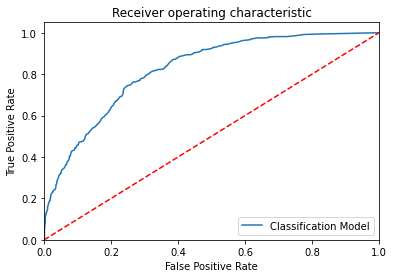

-----------------------------------------------------------------------------------------------------


In [58]:
# Training bagging classifier - BaggingClassifier class of 'sklearn.ensemble' packages to build bagging classifier model. 
# We set DecisionTreeClassifier class as a base estimator and set 100 to the number of estimators, then train the model 
# with train data.  

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 class_weight=None, ccp_alpha=0.0)

modelBAG = BaggingClassifier(base_estimator=modelDT, n_estimators=200, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

# Fit the model with train data

modelBAG.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelBAG.predict(x_test)
y_pred_prob = modelBAG.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelBAG.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#-------------------------------------------------------------------------------------
new_row = {'Model Name' : modelBAG,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
TeleResults = TeleResults.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------

# Bagging Classifier with other classification models as base model

In [60]:
# Checking accuracy by changing base estimator - 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import BaggingClassifier

modelLR = LogisticRegression()
modelRF = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=0)
modelDT = DecisionTreeClassifier(criterion="entropy")
modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True)
modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

modelXGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                                      subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                      min_impurity_decrease=0.0, init=None,
                                      random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
                                      warm_start=False, validation_fraction=0.1, n_iter_no_change=None,
                                      tol=0.0001, ccp_alpha=0.0)

base_methods=[None, modelLR, modelRF, modelDT, modelSVMGaussian, modelKNN, modelXGB]
for bm in base_methods:
    print("Method: ", bm)
    modelBAG = BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
    
    # fit the model with train data
    
    modelBAG.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = modelBAG.predict(x_test)
    
    # Evaluate the model performance by metrics
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    matrix = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n',matrix)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    print('-----------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : bm,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    TeleResults = TeleResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------

Method:  None
Confusion matrix : 
 [[ 218  261]
 [ 133 1149]]
Outcome values : 
 218 261 133 1149
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.46      0.53       479
           0       0.81      0.90      0.85      1282

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.76      0.78      0.76      1761

Accuracy : 77.6 %
Precision : 62.1 %
Recall : 45.5 %
F1 Score : 0.525
Balanced Accuracy : 67.6 %
MCC : 0.391
roc_auc_score: 0.676
-----------------------------------------------------------------------
Method:  LogisticRegression()
Confusion matrix : 
 [[ 258  221]
 [ 115 1167]]
Outcome values : 
 258 221 115 1167
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.54      0.61       479
           0       0.84      0.91      0.87      1282

    accuracy                           0.81

In [63]:
#Display the results file
TeleResults

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,(DecisionTreeClassifier(random_state=198925167...,0.779,0.628,0.457,0.529,0.899,0.397,0.677899,0.678
1,NaN,0.776,0.621,0.455,0.525,0.896,0.391,0.675685,0.676
2,LogisticRegression(),0.809,0.692,0.539,0.606,0.91,0.489,0.724459,0.724
3,"RandomForestClassifier(n_estimators=500, rando...",0.793,0.668,0.478,0.557,0.911,0.437,0.694578,0.694
4,DecisionTreeClassifier(criterion='entropy'),0.787,0.647,0.478,0.55,0.902,0.423,0.690288,0.69
5,SVC(probability=True),0.8,0.72,0.43,0.539,0.938,0.444,0.68383,0.684
6,KNeighborsClassifier(),0.762,0.578,0.466,0.516,0.873,0.364,0.669204,0.67
7,GradientBoostingClassifier(loss='deviance'),0.807,0.694,0.52,0.594,0.914,0.479,0.717015,0.717
